<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/Chi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2_contingency

In [16]:
# read in ecommerce data set
e_comm_data = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/E-commerce.csv', index_col=0)
e_comm_data.sample(10)

# we are interested in the Rating and Recommended columns

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
16339,867,50,5,1,0,General,Tops,Knits
17452,1030,36,2,0,4,General,Bottoms,Jeans
7876,1118,67,5,1,0,General,Jackets,Outerwear
11998,602,36,3,0,0,General,Bottoms,Shorts
3592,1077,49,5,1,1,General,Dresses,Dresses
918,1066,35,5,1,1,General,Bottoms,Pants
10056,1081,25,5,1,4,General Petite,Dresses,Dresses
14228,932,43,3,1,0,General,Tops,Sweaters
21122,1008,34,5,1,23,General Petite,Bottoms,Skirts
6513,1095,32,5,1,9,General,Dresses,Dresses


In [17]:
e_comm_data.shape

(23472, 8)

In [18]:
e_comm_data = e_comm_data[['Recommended IND', 'Rating']] # reduce the dataframe to the columns we want
e_comm_data.head()

,Recommended IND,Rating
0,1,4
1,1,5
2,0,3
3,1,5
4,1,5


Use Chi2 to see if the recommendations made on the website are independent of the ratings

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f111f833690>]],
      dtype=object)

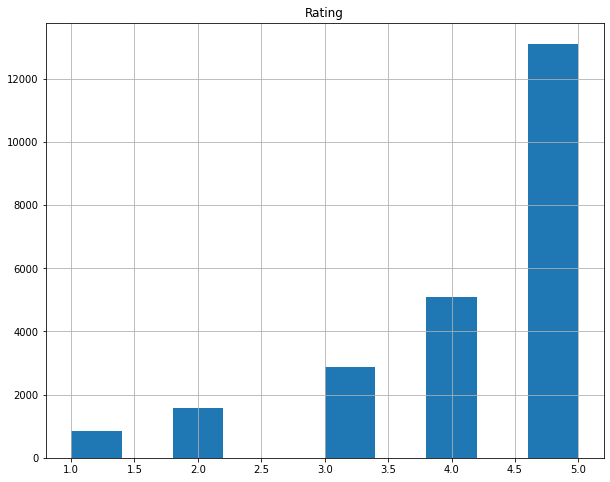

In [19]:
e_comm_data[['Rating']].hist(figsize=(10,8)) # view the product rating distribution

In [20]:
# view the data in a tabular format
df_for_obs = pd.crosstab(e_comm_data['Recommended IND'], e_comm_data['Rating'])
df_for_obs

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13092


Pearson's chi2 statistic to test for the independence of two categorical variables

In [21]:
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(df_for_obs.values)

In [22]:
print('Chi2 stats: {}'.format(round(chi2, 3)))

Chi2 stats: 16711.664


In [23]:
print('The p-values: {}'.format(p_value)) # p-value is 0, so this chi2 test was significant
# the distribution seen in the data was very different than the expected distribution from the recommended 
#   and not recommended products

The p-values: 0.0


In [24]:
print('The degree of freedom: {}'.format(degrees_of_freedom)) # of categories - 1, 5 categories - 1 = 4 degrees of freedom

The degree of freedom: 4


0 column gives us the expected values for the not recommended products, while the 1 column gives us the distribution for the expected values for the recommended products

In [25]:
expected_values

array([[  149.66019087,   278.16888207,   510.30214724,   902.40473756,
         2331.46404226],
       [  692.33980913,  1286.83111793,  2360.69785276,  4174.59526244,
        10785.53595774]])

In [26]:
expected_df = pd.DataFrame({
    '0': expected_values[0],
    '1': expected_values[1]
})
expected_df

,0,1
0,149.660191,692.339809
1,278.168882,1286.831118
2,510.302147,2360.697853
3,902.404738,4174.595262
4,2331.464042,10785.535958


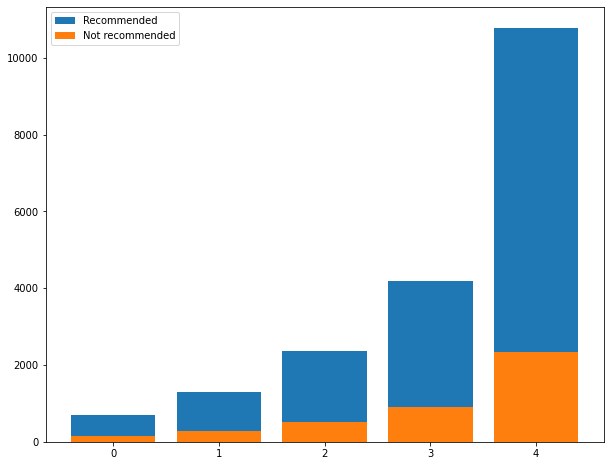

In [27]:
# visualize this with a bar chart
plt.figure(figsize=(10, 8))

plt.bar(expected_df.index, expected_df['1'], label="Recommended")
plt.bar(expected_df.index, expected_df['0'], label="Not recommended")

plt.legend()

This is what chi2 expected the ratings distribution to look like

Visualize the actual observation

In [28]:
ratings_recommended = e_comm_data[e_comm_data['Recommended IND'] == 1]
ratings_not_recommended = e_comm_data[e_comm_data['Recommended IND'] == 0]

In [29]:
ratings_recommended.shape, ratings_not_recommended.shape

((19300, 2), (4172, 2))

In [30]:
ratings_recommended.sample(10)

,Recommended IND,Rating
3190,1,5
5347,1,5
789,1,4
19726,1,5
9786,1,5
17946,1,5
19325,1,5
3082,1,4
8215,1,5
8714,1,5


In [31]:
ratings_not_recommended.sample(10)

,Recommended IND,Rating
14975,0,2
2582,0,1
20111,0,3
6866,0,3
19858,0,3
6824,0,3
8324,0,3
19084,0,2
5735,0,2
18782,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f111f2b2750>]],
      dtype=object)

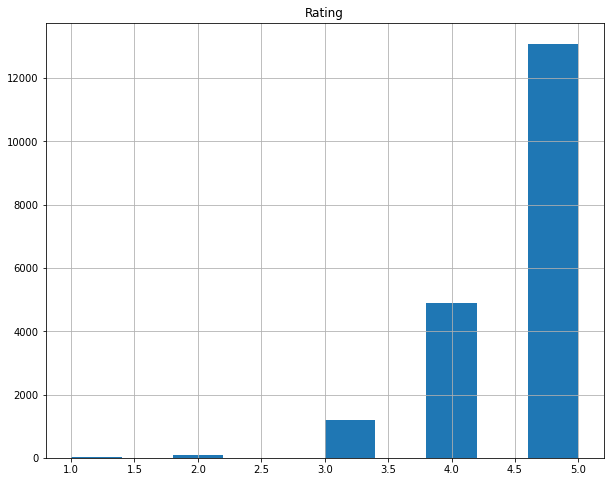

In [32]:
ratings_recommended[['Rating']].hist(figsize=(10, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f111f153790>]],
      dtype=object)

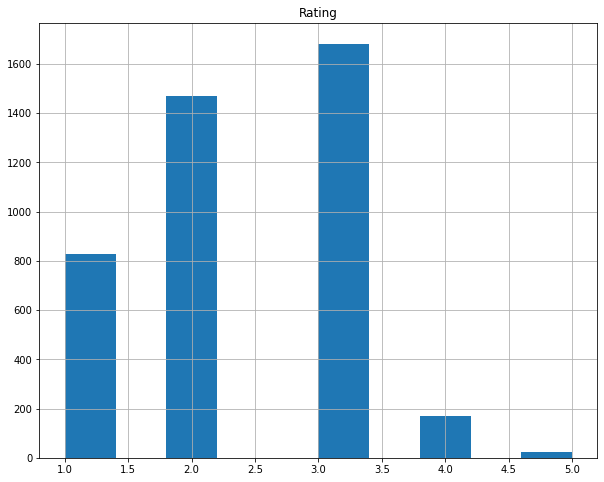

In [33]:
ratings_not_recommended[['Rating']].hist(figsize=(10, 8))

We can clearly see that the ecommerce ratings are not independent of the reviews

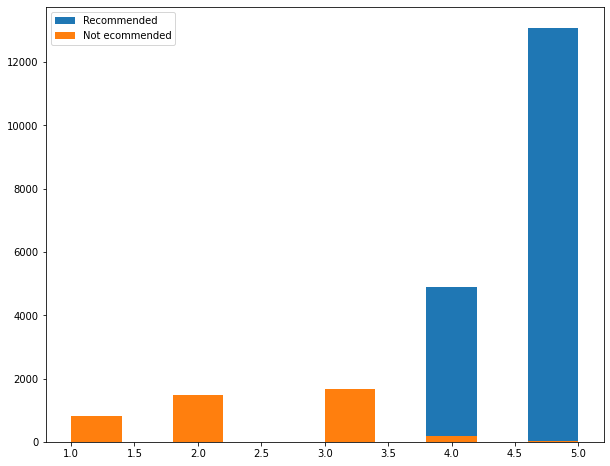

In [34]:
plt.figure(figsize=(10, 8))

plt.hist(ratings_recommended['Rating'], label='Recommended')
plt.hist(ratings_not_recommended['Rating'], label='Not ecommended')

plt.legend()